<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/quantity_sold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

In [16]:
data=pd.read_csv("dairy_dataset.csv")
data.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,17-02-2022,5,Ice Cream,Dodla Dairy,222.40,85.72,...,27-12-2021,21-01-2022,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,01-12-2021,1,Milk,Amul,687.48,42.61,...,03-10-2021,25-10-2021,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,28-02-2022,4,Yogurt,Dodla Dairy,503.48,36.50,...,14-01-2022,13-02-2022,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,09-06-2019,3,Cheese,Britannia Industries,823.36,26.52,...,15-05-2019,26-07-2019,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,14-12-2020,8,Buttermilk,Mother Dairy,147.77,83.85,...,17-10-2020,28-10-2020,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [13]:
columns_to_drop = ['Location', 'Date', 'Product ID', 'Product Name', 'Brand', 'Storage Condition', 'Production Date', 'Expiration Date', 'Customer Location']
data = data.drop(columns_to_drop, axis=1)

non_numeric_columns = ['Farm Size', 'Sales Channel']

X_numeric = data.drop(non_numeric_columns, axis=1)
X_non_numeric = data[non_numeric_columns]

X_non_numeric_encoded = pd.get_dummies(X_non_numeric, drop_first=True)

X_combined = pd.concat([X_numeric, X_non_numeric_encoded], axis=1)

X = X_combined
y = data['Quantity Sold (liters/kg)']  # Change the target to Quantity Sold

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(batch_size=32, epochs=100):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_poly.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # For regression
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


batch_size = 32
epochs = 100

model = create_model(batch_size=batch_size, epochs=epochs)
model.fit(X_train_poly, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

In [22]:
batch_sizes = [32, 64]
epoch_values = [50, 100]

best_model = None
best_mse = float('inf')


for batch_size in batch_sizes:
    for epochs in epoch_values:

        model = create_model(batch_size=batch_size, epochs=epochs)
        model.fit(X_train_poly, y_train, epochs=epochs, batch_size=batch_size, verbose=0)


        y_pred = model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)


        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_batch_size = batch_size
            best_epochs = epochs

print("Best Mean Squared Error:", best_mse)
print("Best Batch Size:", best_batch_size)
print("Best Epochs:", best_epochs)


28/28 [==============================] - 0s 1ms/step
Best Mean Squared Error: 4.15785078649101
Best Batch Size: 64
Best Epochs: 100


In [23]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = best_model.predict(X_test_poly)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate computational time
start_time = time.time()
y_pred = best_model.predict(X_test_poly)
end_time = time.time()
computational_time = end_time - start_time

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Computational Time (seconds):", computational_time)

28/28 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 4.15785078649101
Mean Absolute Error (MAE): 1.2953934328404466
R-squared (R2): 0.9999083915288285
Computational Time (seconds): 0.2254314422607422


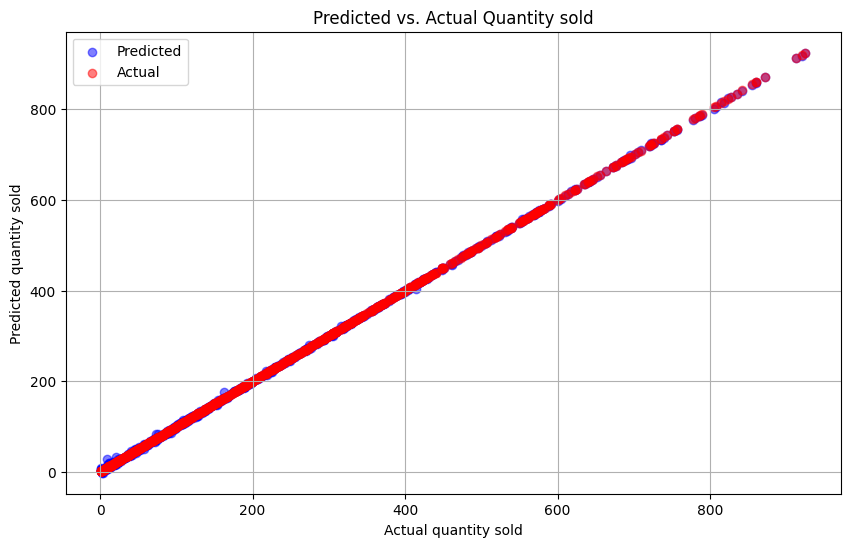

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare y_pred and y_test with different colors
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='red')
plt.title("Predicted vs. Actual Quantity sold")
plt.xlabel("Actual quantity sold")
plt.ylabel("Predicted quantity sold")
plt.legend()
plt.grid(True)
plt.show()


28/28 [==============================] - 0s 1ms/step


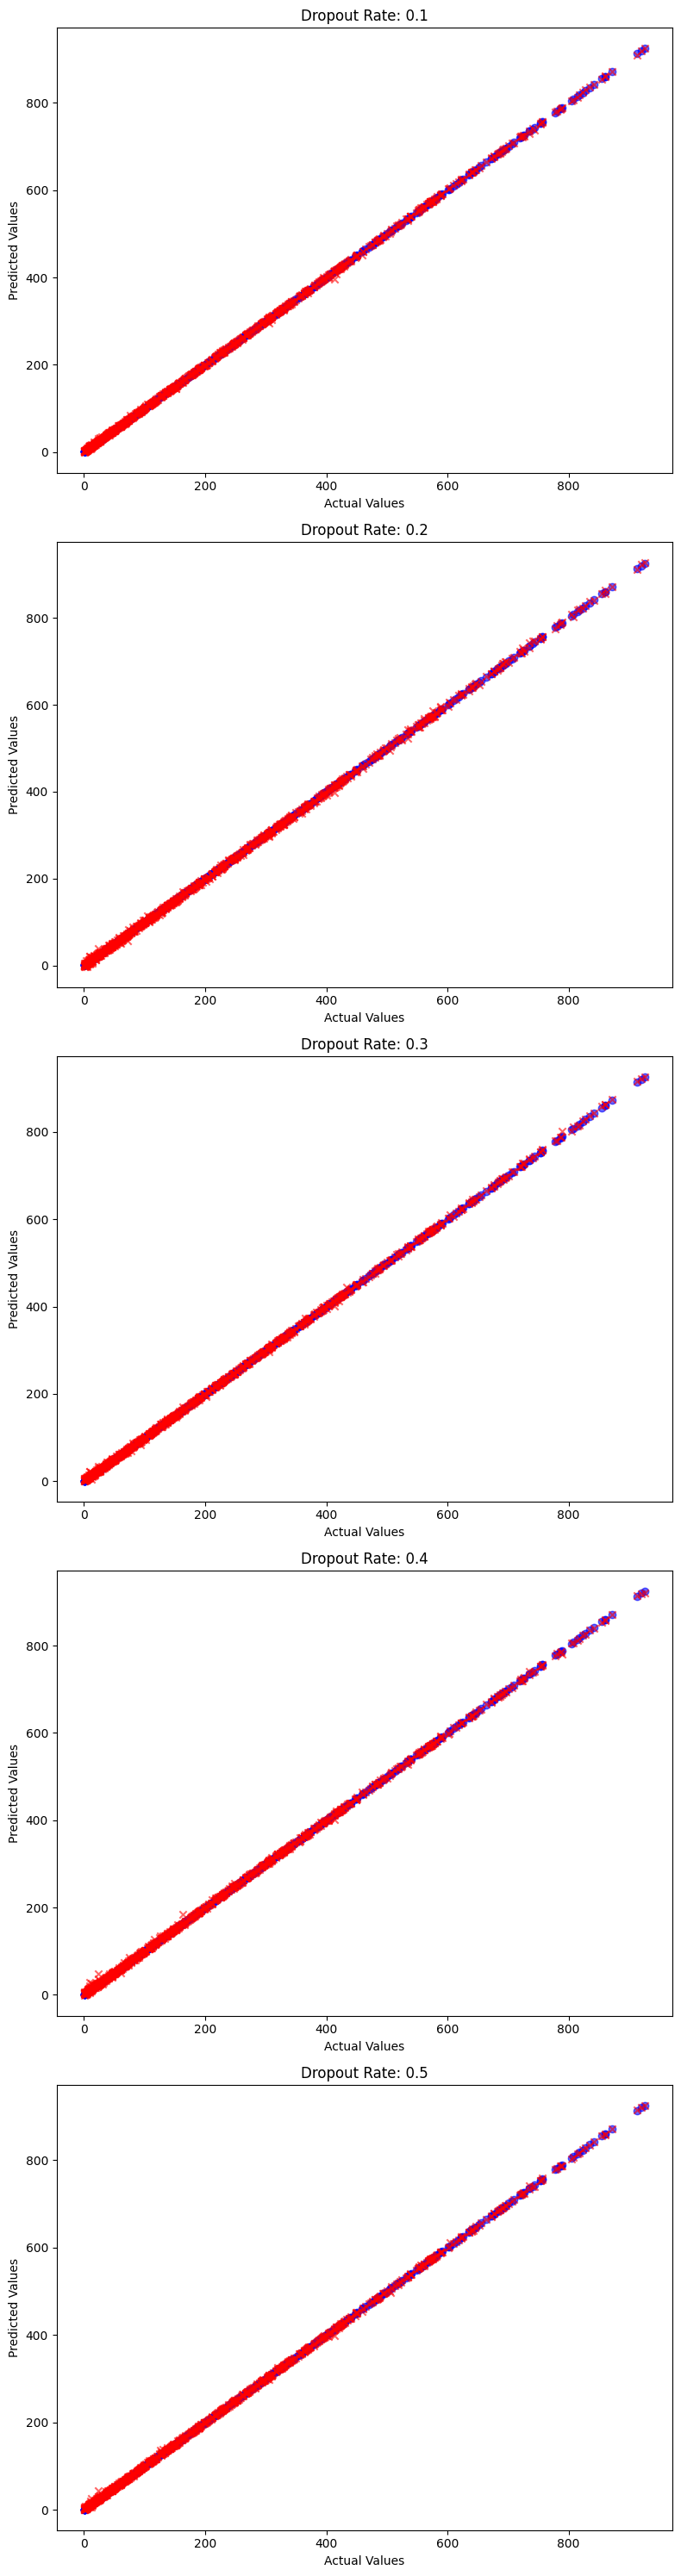

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a list of dropout rates to evaluate
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize a dictionary to store the results
results = {'Dropout Rate': [], 'MSE': [], 'MAE': [], 'R2': []}

# Create a figure and axis for plotting
fig, axes = plt.subplots(nrows=len(dropout_rates), ncols=1, figsize=(8, 6 * len(dropout_rates)))

for i, dropout_rate in enumerate(dropout_rates):
    # Create and compile the model with the current dropout rate
    model = create_model()
    model.layers[1].rate = dropout_rate  # Set dropout rate (assuming it's the second layer)
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train_poly, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Make predictions on the test data
    y_pred = model.predict(X_test_poly)

    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the dictionary
    results['Dropout Rate'].append(dropout_rate)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

    # Plot the predicted vs. actual values
    ax = axes[i]
    ax.scatter(y_test, y_test, c='b', label='Actual', alpha=0.6, marker='o')
    ax.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.6, marker='x')
    ax.set_title(f'Dropout Rate: {dropout_rate}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')


# Convert the results dictionary to a DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('dropout_results.csv', index=False)

# Show the plots
plt.tight_layout()
plt.show()


In [28]:
results

{'Dropout Rate': [0.1, 0.2, 0.3, 0.4, 0.5],
 'MSE': [3.0012958535412735,
  9.107758620174522,
  4.896032689845429,
  6.713588886724764,
  3.8805423645876878],
 'MAE': [1.1486273306642654,
  2.2277164074037805,
  1.507904168532763,
  1.6230339482857312,
  1.238094371540009],
 'R2': [0.9999338734988832,
  0.9997993319419485,
  0.9998921274253084,
  0.9998520818457495,
  0.9999145013682331]}